<a href="https://colab.research.google.com/github/jackrenner1/Stroke-Predictor/blob/main/AI_club.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stroke Predictor**


## **Importing data**


---
Doing all necessary setup. Initializing the dataframe.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

#import dataset as a pandas dataframe
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

#import data for table joins
gender = pd.read_csv("gender.csv")
married = pd.read_csv("married.csv")
residence = pd.read_csv("residence.csv")
smoked = pd.read_csv("smoked.csv")
work = pd.read_csv("work.csv")

Then I drop all irrelevant columns and print out some general data about the dataset.

In [3]:
# get rid of unimportant columns
df = df.drop(columns=['id'])

#printing the data types of each feature
print(df.dtypes)

#displays what is left
df.describe().transpose()

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


Then I use table joins to enumerate any column with strings (objects)

In [4]:
#using inner table joins, enumerate the columns that use strings. This will add the enumerated columns
df = pd.merge(df,gender,how = "inner",on="gender")
df = pd.merge(df,married,how = "inner",on="ever_married")
df = pd.merge(df,residence, how ="inner",on="Residence_type")
df = pd.merge(df,smoked,how = "inner", on="smoking_status")
df = pd.merge(df,work,how = "inner",on="work_type")


#leave only enumerated columns, original ones are not important anymore
df.drop(columns=['gender', "ever_married", "Residence_type", "smoking_status", "work_type"], inplace=True)

#check to make sure everything looks right
df.head()


5110
687


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_value,maried_value,residence_value,smoking_value,work_value
0,67.0,0,1,228.69,36.6,1,1,2,1,2,1
1,81.0,0,0,186.21,29.0,1,1,2,1,2,1
2,71.0,0,0,102.87,27.2,1,1,2,1,2,1
3,78.0,1,0,75.32,NaN,1,1,2,1,2,1
4,78.0,0,0,237.75,NaN,1,1,2,1,2,1


In [5]:
#verifty every column is an number
print(df.dtypes)

age                  float64
hypertension           int64
heart_disease          int64
avg_glucose_level    float64
bmi                  float64
stroke                 int64
gender_value           int64
maried_value           int64
residence_value        int64
smoking_value          int64
work_value             int64
dtype: object


## **Exploratory Data Analysis**

Graphing the target feature and the features with missing data to check for biases.
<br><br>
#### **Null and Duplicated Values**
Shows amount of NaN's in the bmi column.




In [6]:
# amount of usuable data in the bmi 
hf = df.loc[np.isnan(df['bmi'])]
print(len(hf.index))

201


Shows the amount of unuseable data in the smoking column.

In [8]:
# a smoking value of 1 means it was unknown if the person smoked or not, this is not very helpful to us.
hf = df.loc[df['smoking_value'] == 1]
print(len(hf.index))

1544


Shows the amount of time that for the same row the bmi and smoking value is missing


In [9]:
hf = hf.loc[np.isnan(hf['bmi'])]
print(len(hf.index))

61


This means that the number of unique rows with missing data is 201 + 1544 - 64 = 1681 rows. This would be very bad to delete because the dataset is only around 5000 rows.

In [10]:
#Checking for NaNs in each column, this does not include the unusable data in smoking ("Unknown = 1")
df.isna().sum()

age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
stroke                 0
gender_value           0
maried_value           0
residence_value        0
smoking_value          0
work_value             0
dtype: int64

Shows the number of rows that are identical

In [11]:
print(df.duplicated().sum())



0


#### **Features with Missing Data**

These show the boxplots for the two columns with missing data.

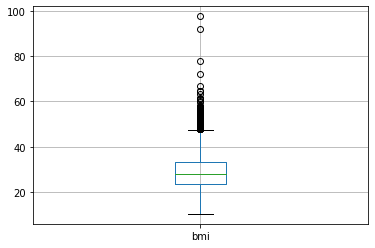

In [12]:
plot = df.boxplot(column=['bmi'])


We can see numerous outliers in one direction, thus the data is skewed.

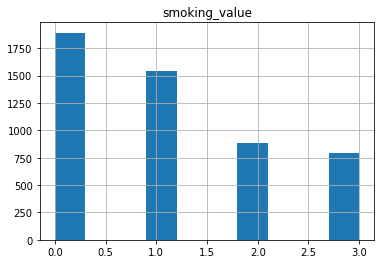

In [14]:
plot = df.hist(column=['smoking_value'])


This histogram also shows that the smoking column is also somewhat skewed.

#### **Target Feature**

Graphing the target feature for this analysis.

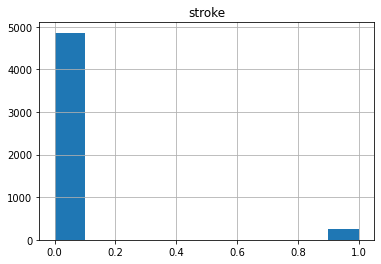

In [15]:
plot = df.hist(column=['stroke'])

The target feature is very skewed. This makes sense though as it is much easier to find people who have not had a stroke.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73cdf293d0>]],
      dtype=object)

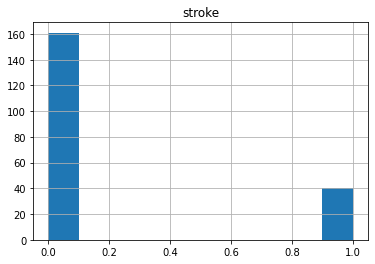

In [18]:
hf = df.loc[np.isnan(df['bmi'])]
hf.hist(column='stroke')


This is a graph of the distribution of missing values for the bmi column. Of course much more of the missing data is going to come from people who have not had a stroke because thats who the majority of the sample was. But, looking at the data in terms of a percentage of people sampled, the missing values seem to be random.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73cdeb95d0>]],
      dtype=object)

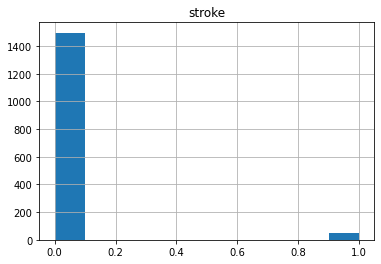

In [19]:
hf = df.loc[df['smoking_value'] == 1]
hf.hist(column='stroke')

This is a graph of the distribution of missing values for the bmi column. The distribution of missing values is mostly random for the same explanation as above.